In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Processed/Processed3/cleaned_output_addcolumns_final_merged_cleaned_questions.csv'
df = pd.read_csv(file_path)

df.head()

Mounted at /content/drive


,Id,CommentCount,ViewCount,Tags,code_snippet,question_line_count,code_line_count,image,pd_score,Reputation,ReputationCategory,answered?
0,9134650,5,3121.0,|reactjs|sql|database|combinations|,0,38,0,0,0.160205,123.0,Low,1
1,15930661,0,112229.0,|javascript|react-native|highcharts|,0,9,0,0,0.012474,2173.0,Mid,1
2,15747536,5,1395.0,|javascript|reactjs|,1,27,22,0,0.071685,93.0,Low,1
3,16642259,3,32710.0,|javascript|design-patterns|reactjs|single-pag...,0,9,0,0,0.003057,2020.0,Mid,1
4,17248504,2,23631.0,|javascript|facebook|jslint|jshint|reactjs|,1,13,8,0,0.029622,4184.0,High,1


In [2]:
missing_values = df['Reputation'].isna().sum()
zero_values = (df['Reputation'] == 0).sum()
print(f"Jumlah missing values di kolom 'Reputation': {missing_values}")
print(f"Jumlah nilai 0 di kolom 'Reputation': {zero_values}")

Jumlah missing values di kolom 'Reputation': 0
Jumlah nilai 0 di kolom 'Reputation': 0


In [5]:
category_order = ['Low', 'Mid', 'High']
df['ReputationCategory'] = pd.Categorical(df['ReputationCategory'], categories=category_order, ordered=True)

avg_pd_score_by_reputation = df.groupby('ReputationCategory', observed=True)['pd_score'].mean().reset_index()

avg_pd_score_by_reputation = avg_pd_score_by_reputation.sort_values(by='ReputationCategory')

print("Average pd_score for each ReputationCategory: ")
print(avg_pd_score_by_reputation)

Average pd_score for each ReputationCategory: 
  ReputationCategory  pd_score
0                Low  0.623673
1                Mid  0.488686
2               High  0.462403


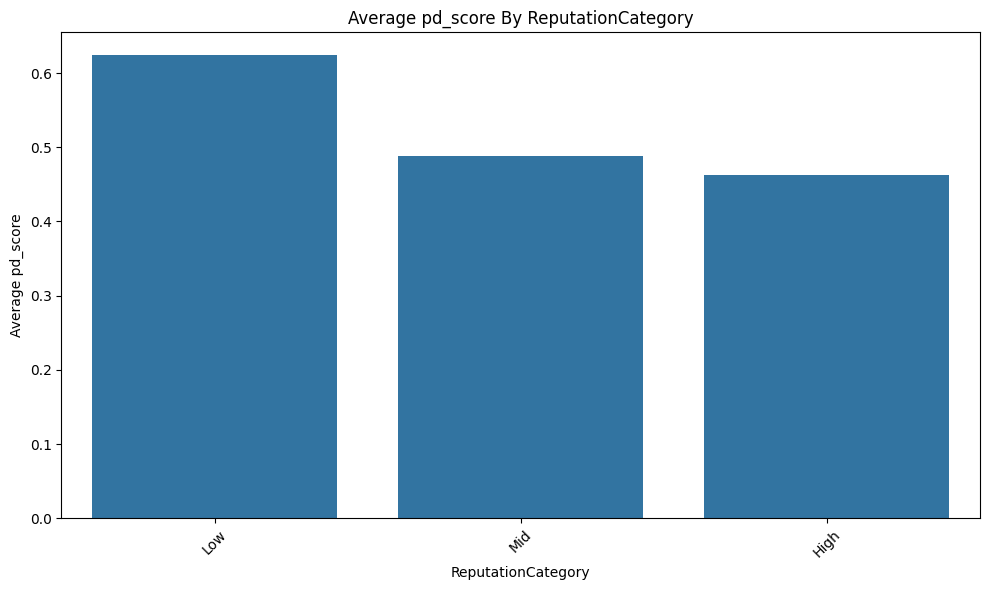

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ReputationCategory', y='pd_score', data=avg_pd_score_by_reputation)
plt.title('Average pd_score By ReputationCategory')
plt.ylabel('Average pd_score')
plt.xlabel('ReputationCategory')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
df['Tags'] = df['Tags'].apply(lambda x: x.split('|'))

df_exploded = df.explode('Tags')

tags_list = ['reactjs', 'react-native', 'react-redux', 'react-router', 'react-hooks',
             'react-navigation',
             'react-bootstrap', 'react-native-ios', 'react-props', 'react-native-flatlist',
             'react-apollo', 'react-testing-library', 'react-select',
             'react-dom', 'reactjs-flux', 'create-react-app', 'reactjs.net', 'reactjs-testutils',
             'konvajs-reactjs', 'reactjs-native', 'video-reactjs', 'reactjs-popup',
             'applicationinsights-react-js']

df_filtered_tags = df_exploded[df_exploded['Tags'].isin(tags_list)]

avg_pd_score_by_tags = df_filtered_tags.groupby('Tags')['pd_score'].mean().reset_index()

avg_pd_score_by_tags = avg_pd_score_by_tags.sort_values(by='pd_score')

print("\nAverage pd_score per Tags:")
print(avg_pd_score_by_tags)


Average pd_score per Tags:
                            Tags  pd_score
0   applicationinsights-react-js  0.026759
19                 reactjs-popup  0.145581
15         react-testing-library  0.180568
2                konvajs-reactjs  0.206824
9               react-native-ios  0.227844
21                   reactjs.net  0.231374
3                   react-apollo  0.243137
20             reactjs-testutils  0.247554
14                  react-select  0.252352
1               create-react-app  0.256287
22                 video-reactjs  0.288647
18                reactjs-native  0.290977
10              react-navigation  0.331422
8          react-native-flatlist  0.342898
4                react-bootstrap  0.375793
17                  reactjs-flux  0.386346
7                   react-native  0.394185
5                      react-dom  0.409355
13                  react-router  0.494870
12                   react-redux  0.577180
16                       reactjs  0.607308
6                    react

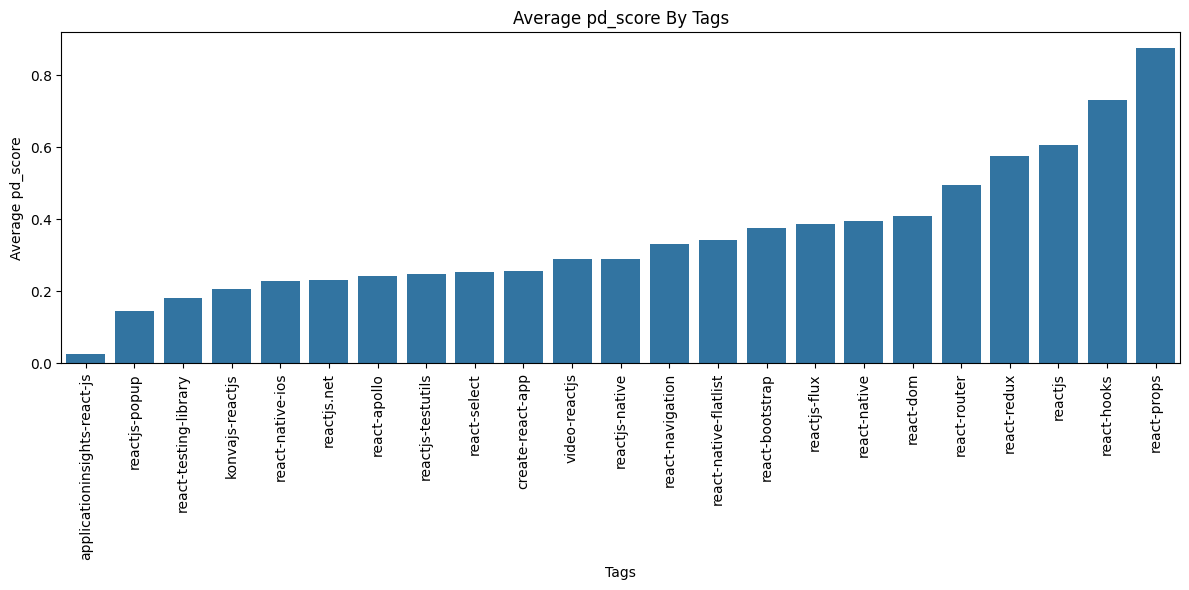

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Tags', y='pd_score', data=avg_pd_score_by_tags)
plt.title('Average pd_score By Tags')
plt.ylabel('Average pd_score')
plt.xlabel('Tags')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
avg_pd_score_by_reputation.to_csv('/content/drive/MyDrive/Processed/Processed3/avg_pd_score_per_reputation.csv', index=False)
avg_pd_score_by_tags.to_csv('/content/drive/MyDrive/Processed/Processed3/avg_pd_score_per_tags.csv', index=False)